In [1]:
def plot_incremental_rainfall(rainfall_array, ax):
    
    # Define custom labels for the bars
    bar_labels = ['F2', 'F1', 'C', 'B1', 'B2']

    # Define the color mapping
    color_mapping = {
        'F2': (0.0, 0.0, 1.0, 0.6),       # Blue with 0.6 transparency
        'F1': (0.0, 0.6902, 1.0, 0.6),    # Light blue with 0.6 transparency
        'C': (0.5, 0.5, 0.5, 0.6),        # Gray with 0.6 transparency
        'B1': (0.8039, 0.0, 0.0, 0.6),    # Red with 0.6 transparency
        'B2': (0.5451, 0.0, 0.0, 0.6)     # Dark red with 0.6 transparency
    }

    # Find the index of the maximum value
    index_of_max = np.argmax(rainfall_array)

    # Initialize all bars with a default color (e.g., white or light gray)
    colors = ['white'] * len(rainfall_array)  # Default color for all bars

    # Apply the color from the color_mapping to the bar at index_of_max
    colors[index_of_max] = color_mapping[bar_labels[index_of_max]]

    # Create the bar chart
    time_steps = np.arange(1, len(rainfall_array) + 1)
    ax.bar(time_steps, rainfall_array, label='Incremental Rainfall', color=colors, edgecolor='black')

    # Set custom labels on the x-axis
    ax.set_xticks(time_steps, bar_labels)
    ax.set_xlabel('Time step', fontsize=15)
    ax.set_ylabel('Rainfall (mm)', fontsize=15)
    ax.set_title('Rainfall accumulations (5 bins)', fontsize=20)
    ax.grid('off');


In [59]:
def make_roberto_plot (sample, axs):
    
    cumulative_rainfall, cumulative_rainfall_times = create_cumulative_event(sample)
    dimensionless_cumulative_rainfall, dimensionless_times =  create_dimensionless_event(cumulative_rainfall, cumulative_rainfall_times)
    interpolated_n_cumulative_rainfall, interpolated_n_times = interpolate_rainfall(dimensionless_cumulative_rainfall,n)
    interpolated_n_incremental_rainfall = create_incremental_event(interpolated_n_cumulative_rainfall)
    max_quintile_profile = find_part_with_most_rain(interpolated_n_incremental_rainfall, n)
    
    x_ticks = np.array(range(1, len(sample) + 1)) * 0.5  # [0.5, 1.0, 1.5]
    
    # 1. Raw Data Plot
    # axs[0].bar(range(len(sample), sample))
    axs[0].bar(np.array(range(1, len(sample)+1)) * 0.5, sample, color='royalblue', alpha=0.7, width=0.4)
    axs[0].set_xlabel('Time (hours) ', fontsize=15)
    axs[0].set_ylabel('Rainfall (mm)', fontsize=15)
    axs[0].set_xticks(x_ticks)
    axs[0].set_title('Raw rainfall (mm)', fontsize=20)
    
    # 2. Dimensionless Cumulative Values
    axs[1].plot(dimensionless_times, dimensionless_cumulative_rainfall, label='Cumulative Sum', linewidth=2, marker='o',
                color='royalblue', markerfacecolor='purple')
    axs[1].set_title('Dimensionless cumulative rainfall', fontsize=20)
    axs[1].set_xlabel('Dimensionless time', fontsize=15)
    axs[1].set_ylabel('Dimensionless cumulative rainfall', fontsize=15)
    # axs[1].legend()
    axs[1].grid(False)
    # # Add step plot for the raw cumulative rainfall
    # axs[1].step(dimensionless_times, dimensionless_cumulative_rainfall, 
    #             label='Raw Data (Cumulative)', where='post', color='orange', linestyle='-')


    # 3. Interpolated Cumulative Values
    axs[2].plot(interpolated_n_times, interpolated_n_cumulative_rainfall, label='Cumulative Sum',linewidth=2,  marker='o', 
                color='royalblue', markerfacecolor='purple')
    # axs[2].set_title('Interpolated Cumulative')
    axs[2].set_xlabel('Dimensionless time', fontsize=15)
    axs[2].set_ylabel('Dimensionless cumulative rainfall', fontsize=15)
    axs[2].set_title('Dimensionless cumulative rainfall \n (int to len 5)', fontsize=20)
    axs[2].grid(False)

    # Call the function for the last subplot
    plot_incremental_rainfall(interpolated_n_incremental_rainfall, axs[3])

    for ax in axs:
        ax.tick_params(axis='both', labelsize=14)  # Adjust labelsize as needed
    
    # Show the final figure
    fig.text(-0.03, 0.50, 'RVH \n method', va='center', ha='center', fontsize=18, rotation='horizontal');
    plt.tight_layout()
    plt.show()
    
    
def make_d50_plot(sample, axs):

    cumulative_rainfall, cumulative_rainfall_times = create_cumulative_event(sample)
    dimensionless_cumulative_rainfall, dimensionless_times =  create_dimensionless_event(cumulative_rainfall, cumulative_rainfall_times)
    interpolated_n_cumulative_rainfall, interpolated_n_times = interpolate_rainfall(dimensionless_cumulative_rainfall,n)
    interpolated_n_incremental_rainfall = create_incremental_event(interpolated_n_cumulative_rainfall)
    max_quintile_profile = find_part_with_most_rain(interpolated_n_incremental_rainfall, n)
    
    x_ticks = np.array(range(1, len(sample) + 1)) * 0.5  # [0.5, 1.0, 1.5]
    percentile = 0.5

    ############## 1. Raw Data Plot
    # axs[0].bar(range(len(sample), sample))
    axs[0].bar(np.array(range(1, len(sample)+1)) * 0.5, sample, color='royalblue', alpha=0.7, width=0.4)
    axs[0].set_xlabel('Time (hours) ', fontsize=15)
    axs[0].set_ylabel('Rainfall (mm)', fontsize=15)
    axs[0].set_xticks(x_ticks)
    # axs[0].grid(True)
    axs[0].set_title('Raw rainfall (mm)', fontsize=20)
    
    ##############
    # 2. Dimensionless Cumulative Values
    axs[1].set_title('Dimensionless cumulative rainfall', fontsize=20)
    total_duration = len(sample) * 0.5  # 1.5 hours

    # Adjusted time percentage calculation
    time_percentage = (np.arange(0, len(sample) + 1) / len(sample)) * 100

    axs[1].set_xlabel('Time (%)', fontsize=15)
    axs[1].set_ylabel('Cumulative Probability', fontsize=15)

    axs[1].scatter(time_percentage, dimensionless_cumulative_rainfall, 
                label='Cumulative Sum', linewidth=2, marker='o', color='royalblue')

    # Plot horizontal line at the given percentile value (e.g., 0.5)
    axs[1].axhline(y=percentile, color='black', linestyle='--', label=f'{percentile}th Percentile')

    # Find the point where the step intersects the horizontal line (percentile)
    indices_below = np.where(dimensionless_cumulative_rainfall < percentile)[0]
    indices_above = np.where(dimensionless_cumulative_rainfall >= percentile)[0]

    # Ensure there are indices both below and above the percentile value
    if len(indices_below) > 0 and len(indices_above) > 0:
        index_below = indices_below[-1]  # Last index below the percentile value
        index_above = indices_above[0]   # First index above the percentile value

        # In the case of a step plot, time_percentage[index_above] is where the step happens
        time_for_percentile = time_percentage[index_above]

        # Plot vertical line at the intersection point of the step
        axs[1].axvline(x=time_for_percentile, color='red', linestyle='-', linewidth=3)

        # Annotate the intersection point
        axs[1].annotate(f'{time_for_percentile:.2f}', 
                        xy=(time_for_percentile, percentile),    # The point where the arrow points
                        xytext=(time_for_percentile +3 , percentile + 0.1),  # Adjust these values for closer text
                        arrowprops=dict(facecolor='black', arrowstyle='->'),   # Arrow style
                        fontsize=25)  # Desired font size

    # Step plot for the raw cumulative rainfall
    axs[1].step(time_percentage, dimensionless_cumulative_rainfall, 
               label='Raw Data (Cumulative)', where='post', color='orange', linestyle='-')        
        
    ##############
    # 2. Dimensionless Cumulative Values
    axs[2].set_title('Dimensionless cumulative rainfall, \n with linearly interpolated lines', fontsize=20)
    axs[2].plot(time_percentage, dimensionless_cumulative_rainfall, 
                label='Cumulative Sum', linewidth=2, marker='o', color='royalblue', markerfacecolor='purple')

    # Ad2 step plot for the raw cumulative rainfall
    axs[2].set_xlabel('Time (%)', fontsize=15)
    axs[2].set_ylabel('Cumulative Probability', fontsize=15)
    # axs[2].grid(True)

    # Plot horizontal line for the corresponding sample value
    percentile=0.5
    axs[2].axhline(y=percentile, color='black', linestyle='--', label=f'{percentile}th Percentile')

    # Find the indices where the cumulative rainfall crosses the percentile_value
    indices_below = np.where(dimensionless_cumulative_rainfall < percentile)[0]
    indices_above = np.where(dimensionless_cumulative_rainfall >= percentile)[0]

    # Ensure there are indices both below and above the percentile value
    if len(indices_below) > 0 and len(indices_above) > 0:
        index_below = indices_below[-1]  # Last index below the percentile value
        index_above = indices_above[0]    # First index above the percentile value

        # Perform linear interpolation to find the exact intersection point
        x_below = time_percentage[index_below]
        y_below = dimensionless_cumulative_rainfall[index_below]

        x_above = time_percentage[index_above]
        y_above = dimensionless_cumulative_rainfall[index_above]

        # Calculate the slope
        slope = (y_above - y_below) / (x_above - x_below)
        # Use the formula to find the exact x value where the y value equals percentile_value
        time_for_percentile = x_below + (percentile - y_below) / slope

        # Plot vertical line at the intersection
        axs[2].axvline(x=time_for_percentile, color='red', linestyle='-', linewidth =3)


        # Add annotation for the intersection point
        axs[2].annotate(f'{time_for_percentile:.2f}', 
                        xy=(time_for_percentile, percentile),    # The point where the arrow points
                        xytext=(time_for_percentile + 9, percentile + 0.05),  # Adjust these values for closer text
                        arrowprops=dict(facecolor='black', arrowstyle='->'),   # Arrow style
                        fontsize=25)  # Desired font size


    for ax in axs:
        ax.tick_params(axis='both', labelsize=14)  # Adjust labelsize as needed    
    
    axs[3].axis('off')
    if time_for_percentile <=50:
        axs[3].text(0.5, 0.5, 'Event is \n front-loaded', fontsize=25, ha='center', va='center')
    elif time_for_percentile >=50:
        axs[3].text(0.5, 0.5, 'Event is \n back-loaded', fontsize=25, ha='center', va='center')        
    fig.text(-0.03, 0.50, 'Visser \n method', va='center', ha='center', fontsize=18, rotation='horizontal');
    # Show the final figure
    plt.tight_layout()
    plt.show()

    

In [69]:
def calc_d50_with_interpolation(sample):

    cumulative_rainfall, cumulative_rainfall_times = create_cumulative_event(sample)
    dimensionless_cumulative_rainfall, dimensionless_times =  create_dimensionless_event(cumulative_rainfall, cumulative_rainfall_times)
    interpolated_n_cumulative_rainfall, interpolated_n_times = interpolate_rainfall(dimensionless_cumulative_rainfall,n)
    interpolated_n_incremental_rainfall = create_incremental_event(interpolated_n_cumulative_rainfall)
    max_quintile_profile = find_part_with_most_rain(interpolated_n_incremental_rainfall, n)
    
    percentile = 0.5
    
    time_percentage = (np.arange(0, len(sample) + 1) / len(sample)) * 100
    
    # Find the indices where the cumulative rainfall crosses the percentile_value
    indices_below = np.where(dimensionless_cumulative_rainfall < percentile)[0]
    indices_above = np.where(dimensionless_cumulative_rainfall >= percentile)[0]

    # Ensure there are indices both below and above the percentile value
    if len(indices_below) > 0 and len(indices_above) > 0:
        index_below = indices_below[-1]  # Last index below the percentile value
        index_above = indices_above[0]    # First index above the percentile value

        # Perform linear interpolation to find the exact intersection point
        x_below = time_percentage[index_below]
        y_below = dimensionless_cumulative_rainfall[index_below]

        x_above = time_percentage[index_above]
        y_above = dimensionless_cumulative_rainfall[index_above]

        # Calculate the slope
        slope = (y_above - y_below) / (x_above - x_below)
        # Use the formula to find the exact x value where the y value equals percentile_value
        time_for_percentile = x_below + (percentile - y_below) / slope

        return time_for_percentile


In [3]:
def find_max_quintile (precip, n):
    # Difference with this to Huff curve function, is it doesnt normalise
    cumulative_rainfall, cumulative_rainfall_times = create_cumulative_event(precip)
    dimensionless_cumulative_rainfall, dimensionless_times =  create_dimensionless_event(cumulative_rainfall, cumulative_rainfall_times)
    interpolated_n_cumulative_rainfall, interpolated_n_times = interpolate_rainfall(dimensionless_cumulative_rainfall,n)
    interpolated_n_incremental_rainfall = create_incremental_event(interpolated_n_cumulative_rainfall)
    max_quintile_profile = find_part_with_most_rain(interpolated_n_incremental_rainfall, n)
    
    return max_quintile_profile 


def create_cumulative_event(rainfall, interval=0.5):
    
    # Calculate cumulative rainfall
    cumulative_rainfall = np.cumsum(rainfall)
    cumulative_rainfall = [0] + cumulative_rainfall
    
    # Generate corresponding time points
    time_points = np.arange(0, len(rainfall) + 1) * interval
    
    return  [0] + cumulative_rainfall.tolist(), time_points.tolist()

def create_incremental_event(cumulative_rainfall):
    if cumulative_rainfall is None :
        return None
    raw_rainfall = np.diff(cumulative_rainfall, prepend=0)
    return raw_rainfall [1:]


def create_dimensionless_event(cumulative_rainfall, cumulative_rainfall_times):
    # Normalize the cumulative rainfall by the total event depth
    total_event_depth = cumulative_rainfall[-1]
    normalized_cumulative_rainfall = np.array(cumulative_rainfall) / total_event_depth

    # Normalize the cumulative rainfall times by the total event time
    total_event_time = cumulative_rainfall_times[-1]
    normalized_cumulative_rainfall_times = np.array(cumulative_rainfall_times) / total_event_time
    
    return normalized_cumulative_rainfall, normalized_cumulative_rainfall_times

def interpolate_rainfall(rainfall, bin_number):
    if rainfall is None or len(rainfall) < 2:
        return None

    # Define target points for bin_number bins
    target_points = np.linspace(0, 1, bin_number+1)
    
    # Create interpolation function based on existing data points
    rainfall_times = np.array(range(0, len(rainfall)))

    # Normalize time from 0 to 1
    normalized_time = (rainfall_times - rainfall_times[0]) / (rainfall_times[-1] - rainfall_times[0])
    interpolation_func = interp1d(normalized_time, rainfall, kind='linear', fill_value="extrapolate")
    
    # Interpolate values at target points
    interpolated_values = interpolation_func(target_points)
    
    return interpolated_values, target_points

def create_incremental_event(cumulative_rainfall):
    if cumulative_rainfall is None :
        return None
    raw_rainfall = np.diff(cumulative_rainfall, prepend=0)
    return raw_rainfall [1:]

def find_part_with_most_rain(array, n, plot=False, ax=False):

    # Compute differences
    # Split the array into 5 equal parts
    splits = np.array_split(array, n)

    max_array_rainfall = 0
    max_array_num = None

    total_precipitations = []  # To store total precipitation for each split
    split_ranges = []  # To store start and end indices for each split

    # Calculate total precipitation for each split
    split_start = 0
    for split in splits:
        total_precipitation = split.sum()
        total_precipitations.append(total_precipitation)
        split_end = split_start + len(split)
        split_ranges.append((split_start, split_end))
        if total_precipitation > max_array_rainfall:
            max_array_num = len(total_precipitations)
            max_array_rainfall = total_precipitation
        split_start = split_end

    colors = ['lightblue'] * n  # Default color for all splits
    highlight_color = 'yellow'  # Color for the split with the most rainfall

    if plot:
        # Plot the array
        ax.plot(range(1, len(array) + 1), array, label='Precipitation', marker='o')

        # Add vertical lines and shading for each split segment
        for i, (start_index, end_index) in enumerate(split_ranges):
            color = highlight_color if (i + 1) == max_array_num else colors[i]

            # Add vertical lines at the start and end of each split
            ax.axvline(x=start_index + 1, color=color, linestyle='--', label=f'Split {i+1} Start' if i == 0 or (i + 1) == max_array_num else "")
            ax.axvline(x=end_index, color=color, linestyle='--', label=f'Split {i+1} End' if i == 0 or (i + 1) == max_array_num else "")

            # Shade the region for the split
            ax.fill_between(range(start_index + 1, end_index + 1), array[start_index:end_index], color=color, alpha=0.3)

            # Add the total precipitation value behind the shading
            ax.text((start_index + end_index) / 2+0.5, max(array) * 0.05,  # Adjust y-position if needed
                    f'{total_precipitations[i]:.2f}',
                    ha='center', va='center', fontsize=10, color='black', weight='bold', zorder=1)

        ax.set_title(f'Precipitation Values with Splits Marked. Max at {max_array_num}')
        ax.set_xlabel('Time')
        ax.set_ylabel('Precipitation')

    return max_array_num   

def calculate_D50(precipitation_values):
    """
    Calculate D50, the point in time when 50% of cumulative precipitation has occurred during an event.
    
    Parameters:
    - precipitation_values: A list or array of precipitation values for a given event.
    
    Returns:
    - D50: The percentage of the event elapsed when 50% of cumulative precipitation has occurred.
    - D50_index: The index where 50% of cumulative precipitation has occurred.
    - cumulative_precip: The cumulative precipitation values for the event.
    """
    # Ensure input is a numpy array
    if len(precipitation_values) ==1:
        return np.nan, np.nan, np.array(precipitation_values)
    
    precipitation_values = np.array(precipitation_values)
    
    # Step 1: Calculate the cumulative precipitation
    cumulative_precip = np.cumsum(precipitation_values)
    
    # Step 2: Determine the total precipitation
    total_precip = cumulative_precip[-1]
    
    # Step 3: Find the index where 50% of the total precipitation is reached
    halfway_precip = total_precip / 2.0
    D50_index = np.where(cumulative_precip >= halfway_precip)[0][0]  # First index where cumulative precipitation >= 50%
    
    # Step 4: Calculate the percentage of the event duration (D50)
    total_timesteps = len(precipitation_values)
    D50 = (D50_index / (total_timesteps - 1)) * 100
    
    return D50, D50_index, cumulative_precip


In [6]:
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.interpolate import interp1d
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

## Get some sample data

In [10]:
n=5

In [7]:
home_dir = '/nfs/a319/gy17m2a/PhD/'
home_dir2 = '/nfs/a161/gy17m2a/PhD/'

In [8]:
time_period='Future'
gauge_num=1
em = 'bb189'
indy_events_fp = home_dir2 + f"ProcessedData/IndependentEvents/UKCP18_30mins/{time_period}/{em}/{gauge_num}/WholeYear/EventSet/"

files = [f for f in os.listdir(indy_events_fp) if f.endswith('.csv')]
files = np.sort(files)
sample_short = pd.read_csv(indy_events_fp + files[20])
sample_long = pd.read_csv(indy_events_fp + files[70])

In [72]:
calc_d50_with_interpolation (sample)

47.98149733978934

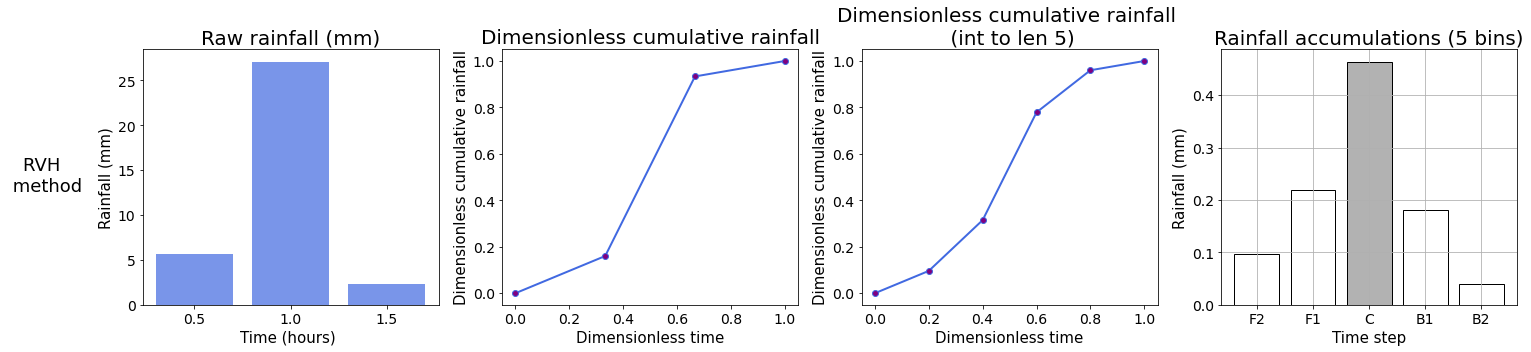

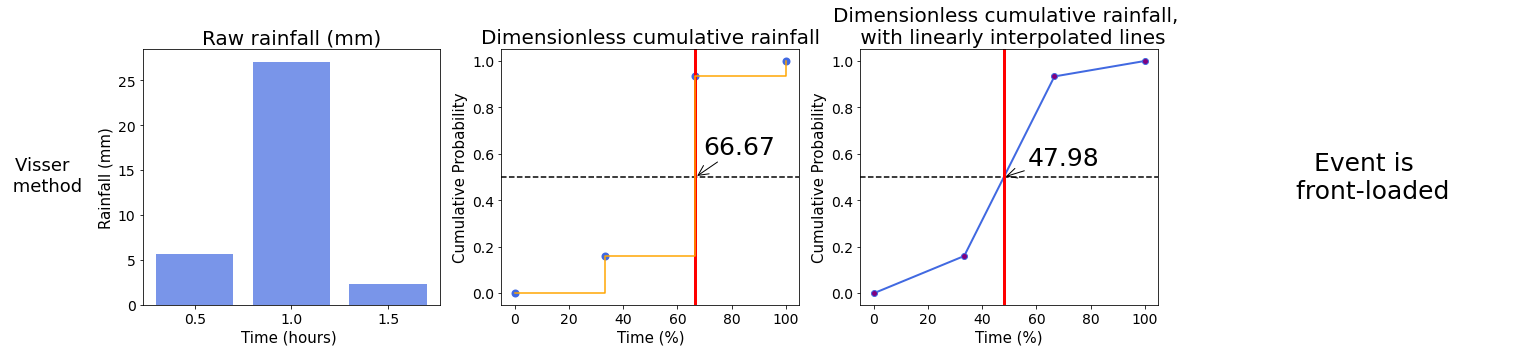

In [71]:
sample_short = pd.read_csv(indy_events_fp + files[1])
sample = sample_short['precipitation (mm)']

fig, axs = plt.subplots(1, 4, figsize=(20, 5))
make_roberto_plot(sample, axs)
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
make_d50_plot(sample, axs)

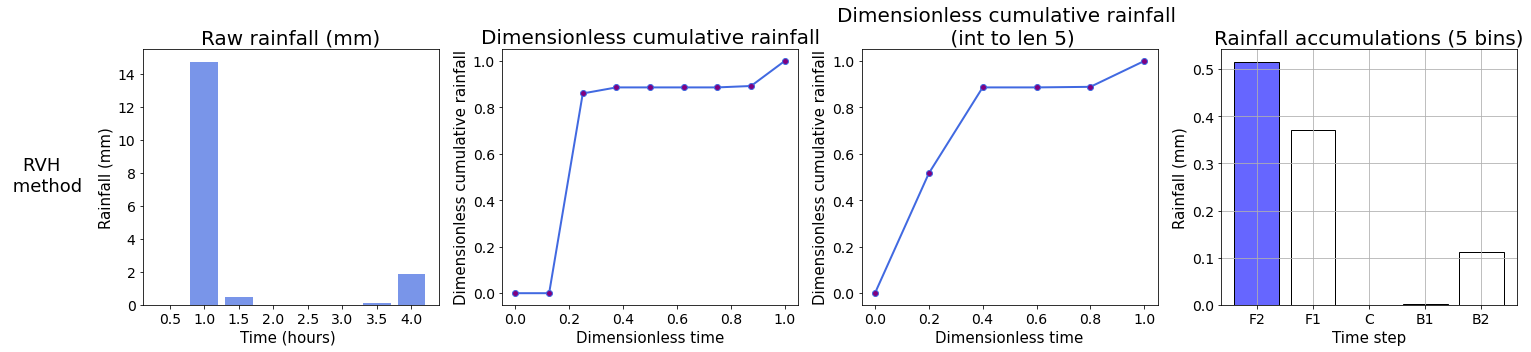

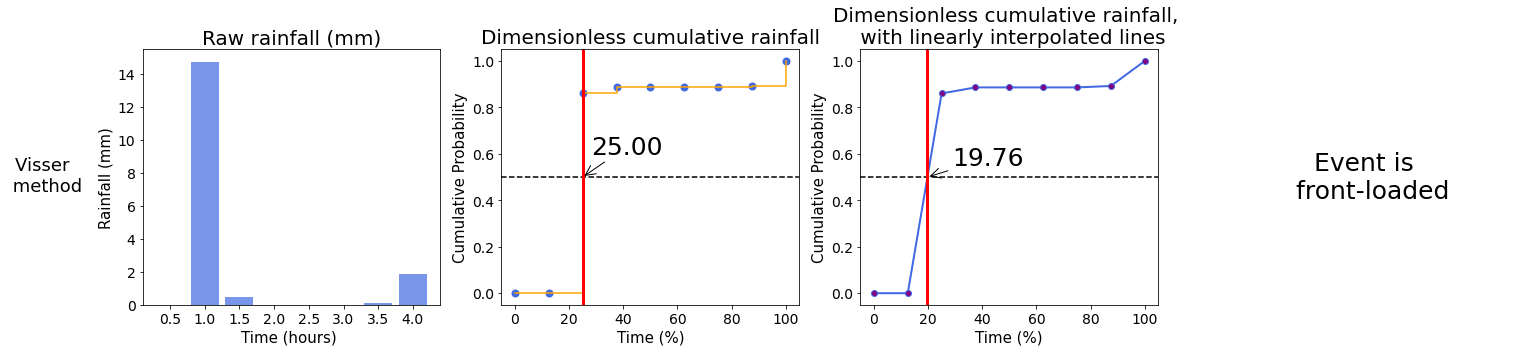

In [54]:
sample_short = pd.read_csv(indy_events_fp + files[0])
sample = sample_short['precipitation (mm)']

fig, axs = plt.subplots(1, 4, figsize=(20, 5))
make_roberto_plot(sample, axs)
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
make_d50_plot(sample, axs)

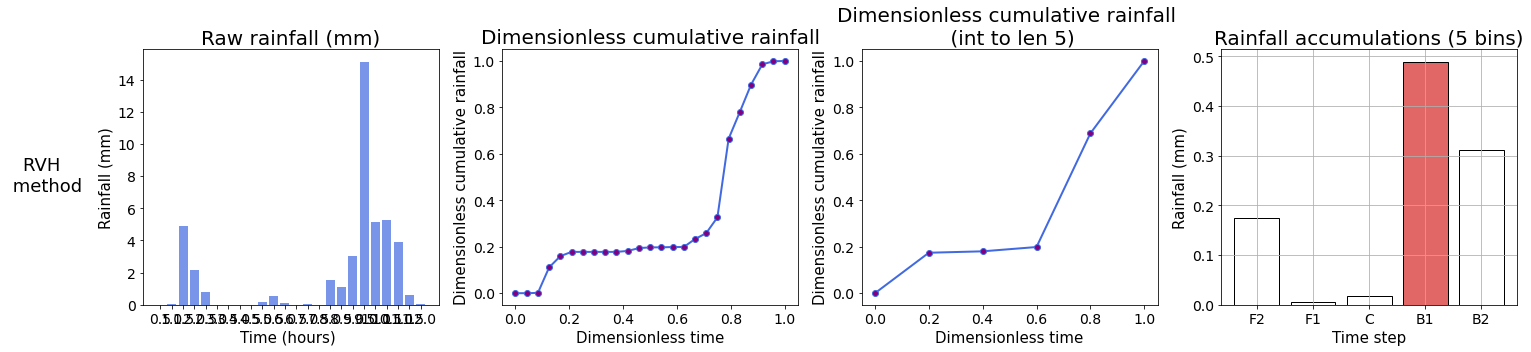

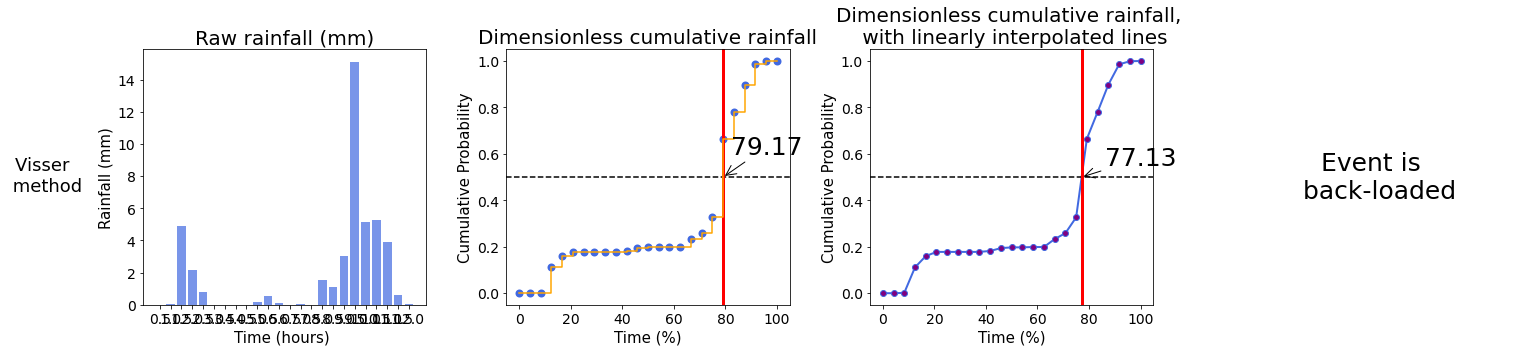

In [65]:
sample_short = pd.read_csv(indy_events_fp + files[20])
sample = sample_short['precipitation (mm)']

fig, axs = plt.subplots(1, 4, figsize=(20, 5))
make_roberto_plot(sample, axs)
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
make_d50_plot(sample, axs)

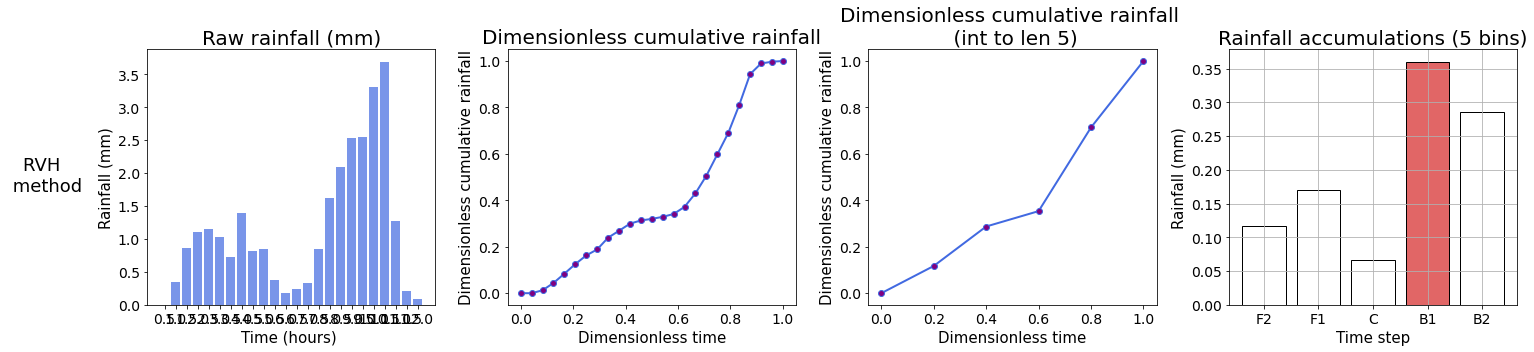

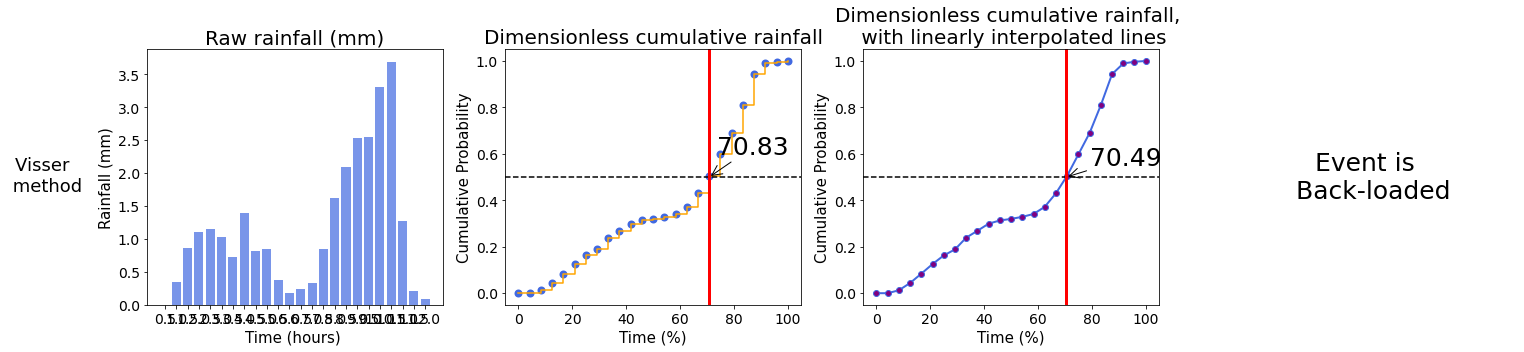

In [52]:
sample_short = pd.read_csv(indy_events_fp + files[30])
sample = sample_short['precipitation (mm)']

fig, axs = plt.subplots(1, 4, figsize=(20, 5))
make_roberto_plot(sample, axs)
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
make_d50_plot(sample, axs)